# Full DL Solution
---
### **Case Study:** Stroke Prediction

**Objective:** The goal of this project is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this project, you would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

# Importing Libraries

We start by importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [3]:
path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(path)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

Now we start the exploratory data analysis.

### Shape of the data

First thing we need to know the shape of our data

**Question 1:** How many examples and features do we have?

In [4]:
#Seeing the shape of the dataset we have
data.shape
#As we can see, we have about 5110 rows and 12 columns

(5110, 12)

In [5]:
#Creating a variable for the row numbers 
nrow = data.shape[0]

#Creating a variable for the column numbers 
ncol = data.shape[1]

#Printing the numbers of rows and columns
print(nrow, ncol)
#As we can see, we have about 5110 rows and 12 columns

5110 12


### Types of different Columns

**Question 2:** Check the type of each feature.

In [6]:
#Seeing the info of the dataset, we can do so by seeing the info of the dataset
data.info()
#As we can see, we have float64(3), int64(4), object(5)
#As we can see, we have object values in our dataset, so we have to convert it to be able to use it in the model buiding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Dealing with categorical variables

**Question 3:** Use the .value_counts() functions to walk through the categorical variables that we have to see the categories and the counts of each of them.

In [7]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
#Seeing the value counts of smoking_status column in our dataset
smoking_types = data['smoking_status'].value_counts()
smoking_types
#As we can see, we have 4 types (never smoked, Unknown,formerly smoked, smokes)

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [9]:
#Seeing the value counts of Residence_type in our dataset
residence_types = data.Residence_type.value_counts()
residence_types
#As we can see, we have two types in Residence_type (Urban and Rural)

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [10]:
#See the value counts of work_type in our dataset
work_types = data['work_type'].value_counts()
work_types
#As we can see, we have 5 types in work_type (Private, Self-employed,children, Govt_job,Never_worked)

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [11]:
#Seeing the value counts of 'ever_married' in our dataset
married_types = data.ever_married.value_counts()
married_types
#As we can see, we have two types in ever_married (Yes and No)

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [12]:
#Seeing the value counts of hypertension
hypertension = data['hypertension'].value_counts()
hypertension
#As we can see, we have two types (0 and 1)

hypertension
0    4612
1     498
Name: count, dtype: int64

In [13]:
#Seeing the value counts of heart_disease in our dataset
heart_disease = data.heart_disease.value_counts()
heart_disease
#As we can see, we have two types in heart_disease (0 and 1)

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [14]:
#Seeing the value counts of stroke in our dataset
stroke = data['stroke'].value_counts()
stroke
#As we can see, we have two types in stroke (0 and 1)

stroke
0    4861
1     249
Name: count, dtype: int64

# Preprocessing

### Before I go further, I have to check for null data and duplicated data in our dataset

#### Checking for null data

In [15]:
#Checking for null data
data.isna().sum()
#As we can see, we have null data in bmi column about (201)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Checking for duplicated data

In [16]:
#Let's check for the duplicated data
data.duplicated().sum()
#As we can see, we do not have duplicated data

0

### Dealing with Nulls

**Question 4:** The bmi column contains nulls. Fill it with the appropriate measure.

In [17]:
#Fillling the null data in bmi, I will fill the null data with the mean as it is one of the popular methods that deals with null data
data['bmi'].fillna(value = data['bmi'].mean(), inplace=True)

In [18]:
#Let's check for the null data after I have filled with the mean
data.isnull().sum()
#As we can see, we do not have null data any longer. We can more forward.

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Encoding Categorical Features

**Question 5:** Here you have to encode those categorical variables to be able to use them to train your DL model.

In [19]:
#Let's first see, data['smoking_status'] before using the LabelEncoder() method
data['smoking_status']

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object

In [20]:
#Let's first see, data['Residence_type'] before using the LabelEncoder() method
data['Residence_type']

0       Urban
1       Rural
2       Rural
3       Urban
4       Rural
        ...  
5105    Urban
5106    Urban
5107    Rural
5108    Rural
5109    Urban
Name: Residence_type, Length: 5110, dtype: object

In [21]:
#Let's first see, data['work_type'] before using the LabelEncoder() method
data['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object

In [22]:
#Let's first see, data['ever_married'] before using the LabelEncoder() method
data['ever_married']

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105    Yes
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 5110, dtype: object

In [23]:
#Let's first see, data['gender']  before using the LabelEncoder() method
data['gender'] 

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object

In [24]:
#As we have seen in our data types, we have object values, so we have to encode them, or change their category type to be able to work with it.

#Let's import the library first which is from sklearn
from sklearn import preprocessing

#Then, create the encoder from LabelEncoder method.
encoder = preprocessing.LabelEncoder()
#Then, we can fit_transform each column with the encoder we have just built
data['smoking_status'] = encoder.fit_transform(data['smoking_status'])
data['Residence_type'] = encoder.fit_transform(data['Residence_type'])
data['work_type'] = encoder.fit_transform(data['work_type'])
data['ever_married'] = encoder.fit_transform(data['ever_married'])
data['gender'] = encoder.fit_transform(data['gender'] )

In [25]:
#Let's just check for them after using LabelEncoder()
data.head()
#As we can see, we have now zeros and ones and not categorical values

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [26]:
#We can check the info as well
data.info()
#Now, we cannot see any object values, which means that it has converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int32  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int32  
 6   work_type          5110 non-null   int32  
 7   Residence_type     5110 non-null   int32  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int32  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(4)
memory usage: 379.4 KB


### Normalizing Features

#### Now, after we have converted the categorical values, we have to normalize the data to be fair when we work with the data

**Question 6:** Normalize the input data

In [27]:
#Let's normalize the data we have
data = data.divide(data.max(axis=0))
data.describe()
#As we can see, it is better now

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.500656,0.207143,0.527154,0.097456,0.054012,0.656164,0.541928,0.508023,0.390622,0.296037,0.458969,0.048728
std,0.290125,0.246522,0.275764,0.296607,0.226063,0.475034,0.272573,0.499985,0.166643,0.078873,0.357178,0.215320
min,0.000919,0.000000,0.000976,0.000000,0.000000,0.000000,0.000000,0.000000,0.202841,0.105533,0.000000,0.000000
25%,0.243231,0.000000,0.304878,0.000000,0.000000,0.000000,0.500000,0.000000,0.284261,0.243852,0.000000,0.000000
50%,0.506334,0.000000,0.548780,0.000000,0.000000,1.000000,0.500000,1.000000,0.338136,0.290984,0.666667,0.000000
75%,0.749685,0.500000,0.743902,0.000000,0.000000,1.000000,0.750000,1.000000,0.419850,0.336066,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Removing Unnecessary Features

**Question 7:** From the features that you have, remove the feature(s) that is(are) irrelevant to your predictions.

In [28]:
#From our dataset, the id column does not give us anything, and we do not need it to make prediction, so I am going to drop it
data = data.drop('id', axis=1)

# Building the DL Model

**Question 8:** Now it's time to build the actual model, and observe a summary of it.

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#First, we build the model 
model = Sequential()
#Then, we can add the input layer with the first layer
model.add(Dense(32, input_dim=10, activation='relu'))
#Then, adding a hidden layer
model.add(Dense(16, activation='relu'))
#Then, adding a hidden layer
model.add(Dense(8, activation='relu'))
#Then, adding a hidden layer
model.add(Dense(4, activation='relu'))
#Then, adding a hidden layer
model.add(Dense(2, activation='relu'))
#Finally, adding the output layer with 1 and sigmoid activation function
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 1065 (4.16 KB)
Trainable params: 1065 (4.1

### Compiling the model

**Question 9:**  Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

### Fitting the model

**Question 10:** Split the data and train the model

We take the first columns as features and the last column as a label, then we split our dataset between training (70%) and testing (30%).

In [31]:
from sklearn.model_selection import train_test_split

# x = data.drop('stroke', axis=1)
# y = data.stroke

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, stratify=y)

we fit the model on 80% training data, and validate on the rest. Later we will do the final test on the test data. The training happens for 15 epochs.

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
112/112 [==============================] - 7s 16ms/step - loss: 0.6494 - accuracy: 0.8809 - precision: 0.0685 - recall: 0.1149 - val_loss: 0.5154 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
112/112 [==============================] - 1s 7ms/step - loss: 0.2770 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2159 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
112/112 [==============================] - 1s 5ms/step - loss: 0.2109 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2040 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
112/112 [==============================] - 1s 7ms/step - loss: 0.2005 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1923 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
112/112 [===========================

# Improving DL Models

**Question 11:** Suggest ways to improve your model

### Checking For Data Imbalance

We check for imbalance because we have a poor recall and precision.

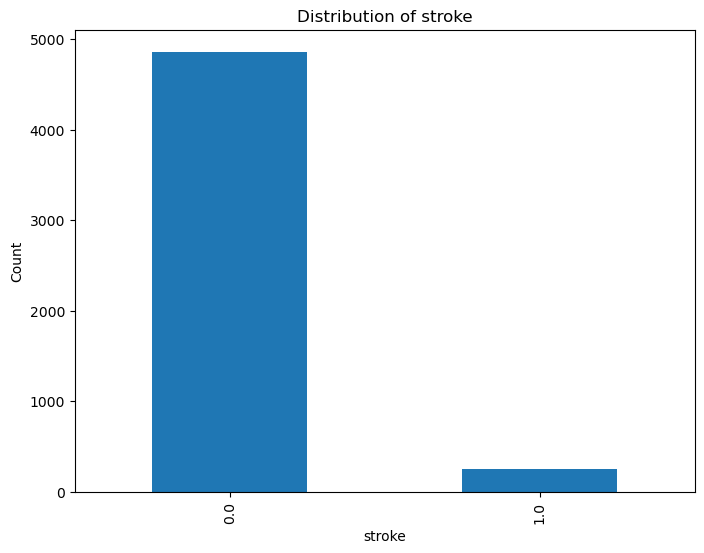

In [33]:
stroke_counts = data.stroke.value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
stroke_counts.plot(kind='bar')
plt.xlabel('stroke')
plt.ylabel('Count')
plt.title('Distribution of stroke')
plt.show()

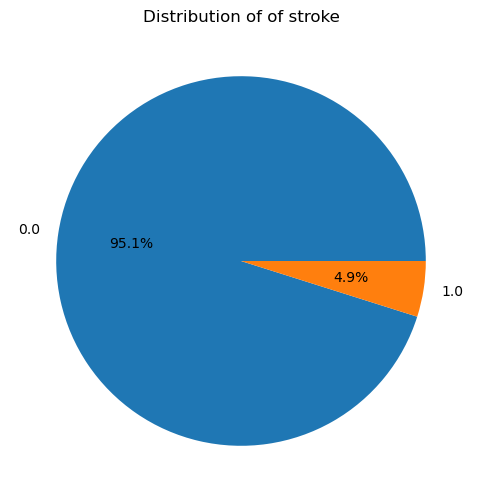

In [34]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%')
plt.title('Distribution of of stroke')
plt.show()

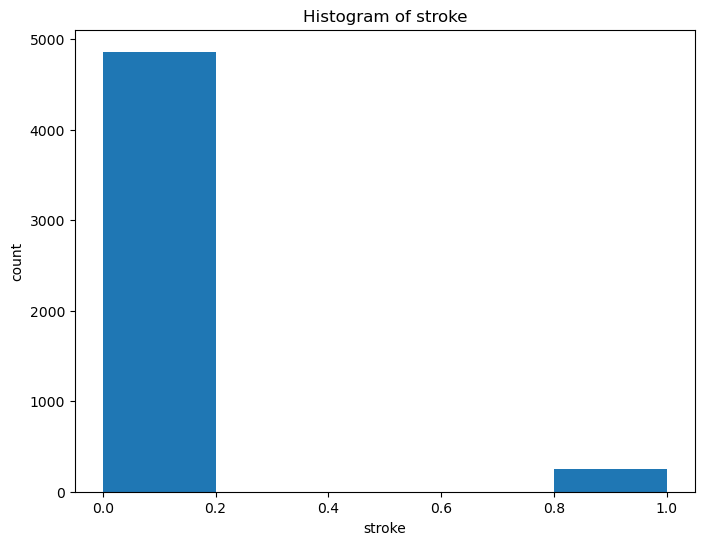

In [35]:
# Create a histogram plot
plt.figure(figsize=(8, 6))
plt.hist(data.stroke, bins=5) 
plt.xlabel('stroke')
plt.ylabel('count')
plt.title('Histogram of stroke')
plt.show()

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

We will oversample this time using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4861.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

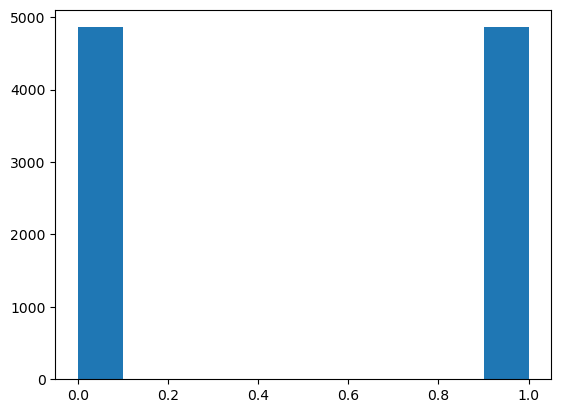

In [36]:
from imblearn.over_sampling import SMOTE

over = SMOTE()
x_new, y_new = over.fit_resample(x, y)


plt.hist([y_new])

Split the balanced dataset between 90% (training and validation), 10% testing
Then divide the 90% between 80% training and 20% validation

In [38]:
from sklearn.model_selection import train_test_split


x_train_val, x_test, y_train_val, y_test = train_test_split(x_new, y_new, test_size=0.1, stratify=y_new)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, stratify=y_train_val)

Now we will train the model on the balanced data, and tune it on the validation set

In [39]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
219/219 [==============================] - 2s 7ms/step - loss: 0.5121 - accuracy: 0.7561 - precision: 0.7549 - recall: 0.7586 - val_loss: 0.4706 - val_accuracy: 0.7771 - val_precision: 0.7539 - val_recall: 0.8229
Epoch 2/15
219/219 [==============================] - 1s 6ms/step - loss: 0.4540 - accuracy: 0.7921 - precision: 0.7724 - recall: 0.8283 - val_loss: 0.4649 - val_accuracy: 0.7880 - val_precision: 0.7698 - val_recall: 0.8217
Epoch 3/15
219/219 [==============================] - 1s 6ms/step - loss: 0.4481 - accuracy: 0.7947 - precision: 0.7768 - recall: 0.8271 - val_loss: 0.4681 - val_accuracy: 0.7857 - val_precision: 0.7475 - val_recall: 0.8629
Epoch 4/15
219/219 [==============================] - 1s 5ms/step - loss: 0.4440 - accuracy: 0.7981 - precision: 0.7753 - recall: 0.8397 - val_loss: 0.4594 - val_accuracy: 0.7943 - val_precision: 0.7778 - val_recall: 0.8240
Epoch 5/15
219/219 [==============================] - 1s 5ms/step - loss: 0.4404 - accuracy: 0.8004 - pr

Evaluate your model on the test set that you kept aside at the beginning.

In [40]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 0s 4ms/step - loss: 0.4444 - accuracy: 0.7852 - precision: 0.7648 - recall: 0.8230


[0.44437360763549805,
 0.7852004170417786,
 0.7648183703422546,
 0.8230452537536621]

We see that the performance gets better when our data became balanced.
Now we will try improving our model with other techniques that we learned through the week.

### Model Design

We will introduce batch normalization after each layer and then train the model

In [41]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

history2 = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
219/219 [==============================] - 13s 14ms/step - loss: 0.6192 - accuracy: 0.6691 - precision: 0.7351 - recall: 0.5289 - val_loss: 0.5629 - val_accuracy: 0.7000 - val_precision: 0.6676 - val_recall: 0.7966
Epoch 2/15
219/219 [==============================] - 2s 8ms/step - loss: 0.5152 - accuracy: 0.7420 - precision: 0.7584 - recall: 0.7103 - val_loss: 0.5051 - val_accuracy: 0.7623 - val_precision: 0.7008 - val_recall: 0.9154
Epoch 3/15
219/219 [==============================] - 2s 9ms/step - loss: 0.4702 - accuracy: 0.7800 - precision: 0.7505 - recall: 0.8389 - val_loss: 0.4752 - val_accuracy: 0.7743 - val_precision: 0.7037 - val_recall: 0.9474
Epoch 4/15
219/219 [==============================] - 2s 9ms/step - loss: 0.4522 - accuracy: 0.7878 - precision: 0.7468 - recall: 0.8711 - val_loss: 0.4396 - val_accuracy: 0.7920 - val_precision: 0.7329 - val_recall: 0.9189
Epoch 5/15
219/219 [==============================] - 2s 9ms/step - loss: 0.4418 - accuracy: 0.7941 - 

In [43]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 0s 4ms/step - loss: 0.3940 - accuracy: 0.8150 - precision: 0.7823 - recall: 0.8724


[0.3940421938896179,
 0.8150051236152649,
 0.7822878360748291,
 0.8724279999732971]

We see that we are achieving better metrics with batch normalization.